In [3]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

import warnings;
warnings.filterwarnings('ignore')

In [4]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=81cc4cc2384f5aa0cd4990fddba38ae87db4f8f1be698c720237c424f03fecd3
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=aa3f134ca72c3b1e86c2aa1f8a499174627431bc211f56cb961fc3728dea0a67
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [1]:
# Uploading dataset

import os
import shutil
from google.colab import files

new_folder = 'Recommender_data'

if os.path.isdir(new_folder):
  shutil.rmtree(new_folder)

os.mkdir(new_folder)

# Upload file in the browse menu generated

uploaded = files.upload()

for filename in uploaded.keys():
  destination =os.path.join(new_folder,filename)
  print(f'move {filename} to {destination}')
  shutil.move(filename,destination)

Saving online_retail_II.xlsx to online_retail_II.xlsx
move online_retail_II.xlsx to Recommender_data/online_retail_II.xlsx


In [5]:
df = pd.read_excel('/content/Recommender_data/online_retail_II.xlsx')
print(df.head(5))

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [6]:
df.shape

(525461, 8)

In [7]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

**Data preprocessing**

In [8]:
# Treating missing data

df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [9]:
# Removing missing values
df.dropna(inplace = True)

In [10]:
# Verifying if rows with missing values are removed
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [11]:
# Converting Stock code to string datatype
df['StockCode'] = df['StockCode'].astype(str)

In [12]:
# Finding the no. of unique customers
customers = df['Customer ID'].unique().tolist()

In [13]:
len(customers)

4383

**Patitioning data to training and validation sets**

In [14]:
random.shuffle(customers) # Shuffling the customer data

train_customers = [customers[i] for i in range(round(0.9* len(customers)))]

train_data = df[df['Customer ID'].isin(train_customers)]

validation_data = df[~df['Customer ID'].isin(train_customers)]


In [15]:
# Creating purchase history of the customers included in the train_data

purchases_train = []

for customer in tqdm(train_customers):
  stockcode = train_data[train_data['Customer ID']==customer]['StockCode'].tolist()
  purchases_train.append(stockcode)

100%|██████████| 3945/3945 [00:09<00:00, 435.43it/s]


In [16]:
# Creating purchase history of the customers included in the validation_data

purchases_valid = []

for customer in tqdm(validation_data['Customer ID'].unique()):
  stockcode = validation_data[validation_data['Customer ID']==customer]['StockCode'].tolist()
  purchases_valid.append(stockcode)

100%|██████████| 438/438 [00:00<00:00, 845.73it/s]


In [17]:
purchases_train[0] # Purchase history of 1st customer in train_data or Sentence-0

['21217',
 '37424',
 '84991',
 '84520D',
 '47559B',
 '21212',
 '21975',
 '21977',
 '84992',
 '85099B',
 '85099C',
 '85099F',
 '21931',
 '20712',
 '20711',
 '20725',
 '21080',
 '22134',
 '22196',
 '22195',
 '22357',
 '22358',
 '21212',
 '21843',
 '22348',
 '22328',
 '21975',
 '22417',
 '84991',
 '22352',
 '21561',
 '21437',
 '22262',
 '22261',
 '22260',
 '22383',
 '22382',
 '22300',
 '22301',
 '21164',
 '20724',
 '21080',
 '21035',
 '21154',
 '21931',
 '85099B',
 '22385',
 '22386',
 '22411',
 '85099C',
 '85099F',
 '22411',
 '22386',
 '85099B',
 '85099F',
 '85099C',
 '22385',
 '21928',
 '20725',
 '22383',
 '22382',
 '20718',
 '22328',
 '21212',
 '21217',
 '21843',
 '22423',
 '84991',
 '21977',
 '22356',
 '20723',
 '21246',
 '21247',
 '37370',
 '22375',
 '21931',
 '79066K',
 '21212',
 '21213',
 '21975',
 '22417',
 '22328',
 '22348',
 '22423',
 '21217',
 '22385',
 '40016',
 '22613',
 '21931',
 '85099B',
 '22386',
 '22411',
 '22383',
 '22384',
 '20725',
 '20727',
 '84692',
 '16161U',
 '2115

**Creating Word2Vec embedding for the products**

In [18]:
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)


model.build_vocab(purchases_train,progress_per=200)
model.train(purchases_train,total_examples=model.corpus_count,epochs=10,report_delay=1)

(3705867, 3755700)

There are many parameters on this constructor; a few noteworthy arguments you may wish to configure are:

    size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
    window: (default 5) The maximum distance between a target word and words around the target word.
    min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
    workers: (default 3) The number of threads to use while training.
    sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).


In [19]:
print(model) # Model has a vocabulary of 3479 unique words and their vectors of size 100 each

Word2Vec<vocab=3482, vector_size=100, alpha=0.03>


**Visualising the vectors**

In [20]:
import umap  # To reduce the dimensionality of the vectors for visualization purposes


In [21]:
print(model.wv.vectors.shape)

(3482, 100)


In [22]:
X=model.wv.vectors

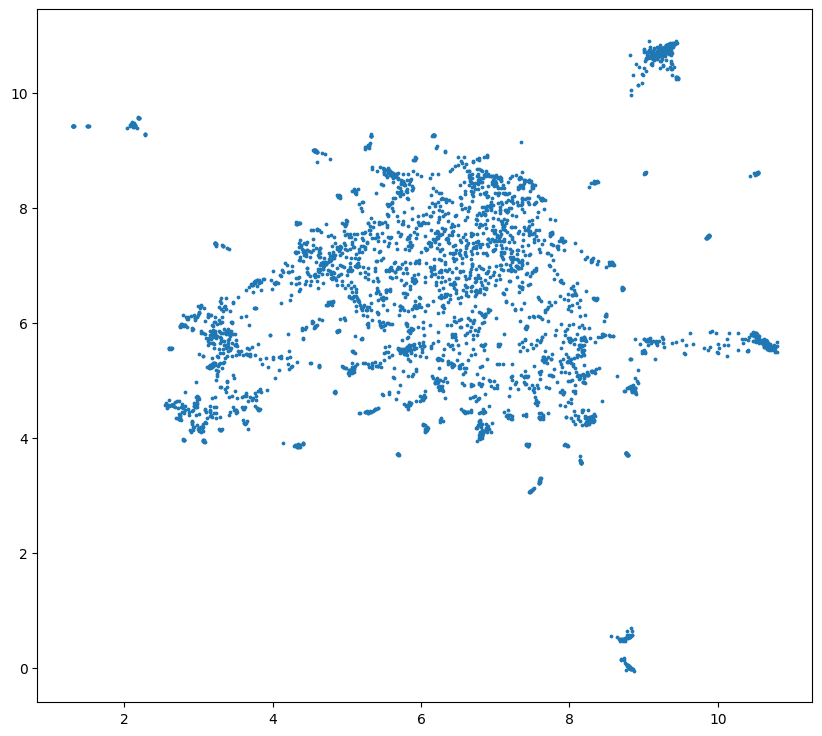

In [23]:
# Reducing the dimensions of the product embeddings from 100 to 2 by using the UMAP algorithm

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

Every dot in this plot is a product. There are several tiny clusters of these data points. These are groups of similar products.

In [24]:
# Creating a product-ID and product-description dictionary

products = train_data[['StockCode','Description']]

# Remove duplicates
products.drop_duplicates(inplace=True, subset = 'StockCode', keep='last')

# Creating the product StockCode-Description Dictionary
product_dictionary = products.groupby('StockCode')['Description'].apply(list).to_dict()

In [25]:
# Finding  products similar to product (ID: 22457, natural slate heart chalkboard )
product_dictionary['21812'][0].lower()

'garland with hearts and bells'

In [26]:
print('Products similar to "'+ product_dictionary['21812'][0].lower() +' with similarity score:')
for name in model.wv.most_similar('21812',topn=10):
  print(f'{product_dictionary[name[0]][0].lower()}, {round(name[1],2)}')

Products similar to "garland with hearts and bells with similarity score:
garland with stars and bells, 0.73
christmas hanging tree with bell, 0.65
christmas hanging heart with bell, 0.64
glitter heart garland with bells , 0.63
star  t-light holder , 0.63
christmas hanging star with bell, 0.62
christmas tree t-light holder, 0.61
set of 4 napkin charms instrument, 0.58
heart garland rustic padded, 0.58
assorted easter decorations  bells, 0.55


**Recommending products based on the entire purchase history of the customer**

In [27]:

# Function to calculate the average of all the vectors of the products the user has bought so far
# and use this resultant vector to find similar products

def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model.wv[i] )
        except KeyError:
            continue

    return np.mean(product_vec, axis=0)


In [28]:
len(purchases_valid[0]) # No. of customers in the test data set

635

In [29]:
aggregate_vectors(purchases_valid[0]).shape # Purchase history of customer-1 in the test set

(100,)

In [30]:
def similar_products(v, n = 6):
    # Extract most similar products for the input vector

    #for name in model.wv.most_similar(v,topn=10):
     #  print(f'{product_dictionary[name[0]][0].lower()}, {round(name[1],2)}')
    return model.wv.most_similar(v,topn=10)


In [31]:
len(purchases_valid) # no.of customers in test data

438

In [64]:
Customer_no = input("choose customer no.: (1-438) ")
print('Products recommended based on purchase history of customer-'+ str(Customer_no) +' with similarity score:')
similar_products(aggregate_vectors(purchases_valid[int(Customer_no)]))

choose customer no.: (1-438) 7
Products recommended based on purchase history of customer-7 with similarity score:


[('85049A', 0.7578816413879395),
 ('22086', 0.7269555926322937),
 ('85049E', 0.7236527800559998),
 ('22734', 0.7137758135795593),
 ('22077', 0.6920883059501648),
 ('22910', 0.6673874855041504),
 ('22835', 0.6613509058952332),
 ('22909', 0.6545132398605347),
 ('22580', 0.6541395783424377),
 ('22113', 0.647131621837616)]

**Recommending products based on the last 10 purchases of the customer**

In [65]:
Customer_no = input("choose customer no.: (1-438) ")
print('Products recommended based on purchase history(last 10 purchases) of customer-'+ str(Customer_no) +' with similarity score:')
similar_products(aggregate_vectors(purchases_valid[int(Customer_no)][-10:]))

choose customer no.: (1-438) 8
Products recommended based on purchase history(last 10 purchases) of customer-8 with similarity score:


[('82580', 0.6432666182518005),
 ('22457', 0.6401897668838501),
 ('22964', 0.6247691512107849),
 ('22488', 0.6190935969352722),
 ('22915', 0.6163299083709717),
 ('22966', 0.6145574450492859),
 ('22829', 0.6133120656013489),
 ('22923', 0.6115604043006897),
 ('22937', 0.6040732264518738),
 ('82583', 0.6028977632522583)]

**Model Evaluation**

In [44]:
# Removing customers with purchase history less than 50 items

customer_array = []

for i in range(len(purchases_valid)):
  if len(purchases_valid[i]) >= 50:
    customer_array.append(i)

# Customers with purchase history greater than 50 items
print(len(customer_array))  # 206 Customers with purchase history greater than 50 items
print(customer_array)

206
[0, 4, 5, 6, 8, 9, 11, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 45, 46, 48, 49, 51, 53, 54, 55, 56, 58, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 90, 91, 94, 95, 97, 98, 99, 100, 102, 103, 104, 105, 106, 109, 110, 111, 112, 114, 115, 117, 118, 123, 125, 126, 128, 129, 130, 131, 133, 134, 136, 137, 141, 143, 149, 152, 158, 160, 161, 164, 165, 166, 167, 168, 169, 171, 173, 175, 176, 177, 178, 179, 181, 182, 183, 185, 188, 189, 191, 192, 197, 200, 204, 205, 206, 208, 210, 211, 216, 217, 218, 219, 222, 229, 231, 232, 237, 238, 239, 240, 242, 244, 245, 247, 248, 249, 250, 252, 254, 256, 263, 264, 265, 268, 270, 271, 277, 279, 286, 293, 297, 300, 304, 307, 308, 313, 315, 316, 317, 318, 322, 323, 324, 330, 334, 336, 337, 338, 346, 348, 353, 355, 356, 358, 359, 364, 365, 366, 368, 377, 378, 380, 394, 396, 405, 407, 418, 420, 429, 430, 436]


17 of the customers among 206 got recommendations with precision > 0.5
Precision of the model lies between 0.0 and 0.9
Recall of the model lies between 0.0 and 0.18


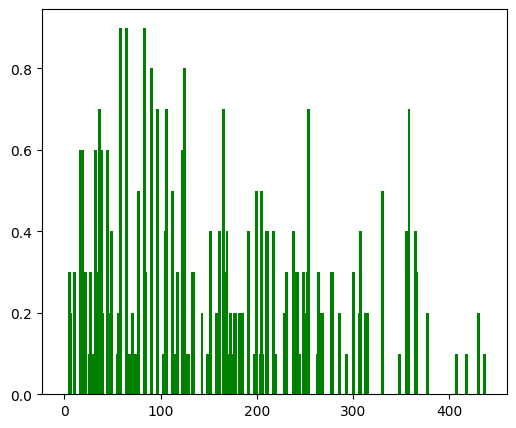

In [52]:
# Calculting precision and recall for the customers

precision = []
recall = []
recommended_products = {}


for customer in customer_array:
  recommended = []
  relevant_items = []
  recommended_products[customer] = similar_products(aggregate_vectors(purchases_valid[int(customer)][:39]))

  for i in purchases_valid[customer][40:50]:
    if i in model.wv:
      for item in model.wv.most_similar(i,topn=5):
        relevant_items.append(item[0])

  for item in recommended_products[customer]:
    recommended.append(item[0])

  true_positive = len(set(recommended).intersection(set(relevant_items)))
  precision_value = true_positive / 10
  total_relevant_items = len(relevant_items)
  recall_value = true_positive / total_relevant_items

  precision.append(precision_value)
  recall.append(recall_value)


plt.figure(figsize=(6,5))
plt.bar(customer_array,precision, color ='green',
        width = 3)

count = 0

for i in precision:
  if i > 0.5 :
    count += 1

print(f'{count} of the customers among {len(customer_array)} got recommendations with precision > 0.5')
print(f'Precision of the model lies between {min(precision)} and {max(precision)}')
print(f'Recall of the model lies between {min(recall)} and {max(recall)}')



In [47]:
# Calculating the nDCG  values for the customers

In [59]:
relevant = []
recommended =[]

for customer in customer_array:
  recommended_items = []
  relevant_items = []

  for i in purchases_valid[customer][40:50]:
    if i in model.wv:
      for item in model.wv.most_similar(i,topn=5):
        relevant_items.append(item[0])

  for item in recommended_products[customer]:
    recommended_items.append(item[0])

  relevant.append(relevant_items)
  recommended.append(recommended_items)



In [63]:
import math
def discounted_cumulative_gain(recommended_items, relevant_items):
    dcg = 0
    for i, item in enumerate(recommended_items, start=1):
        if item in relevant_items:
            dcg += 1 / (math.log2(i + 1))
    return dcg

def ideal_discounted_cumulative_gain(recommended_items, relevant_items):
    sorted_relevant_items = sorted(relevant_items, key=lambda x: recommended_items.index(x) if x in recommended_items else float('inf'))
    return discounted_cumulative_gain(sorted_relevant_items, relevant_items)

def normalized_discounted_cumulative_gain(recommended_items, relevant_items):
    dcg = discounted_cumulative_gain(recommended_items, relevant_items)
    idcg = ideal_discounted_cumulative_gain(recommended_items, relevant_items)

    if idcg == 0:
        return 0
    else:
        return round(dcg / idcg, 2)


ndcg_values = [normalized_discounted_cumulative_gain(rec, rel)
               for rec, rel in zip(recommended, relevant)]


for i in ndcg_values:
  if i > 0.2 :
    count += 1

print(f'NDCG values of the model lies between {min(ndcg_values)} and {max(ndcg_values)} and {count} customers obtained positionally correct recommendations with ndcg > 0.2')




NDCG values of the model lies between 0.0 and 0.33 and 36 customers obtained positionally correct recommendations with ndcg > 0.2
